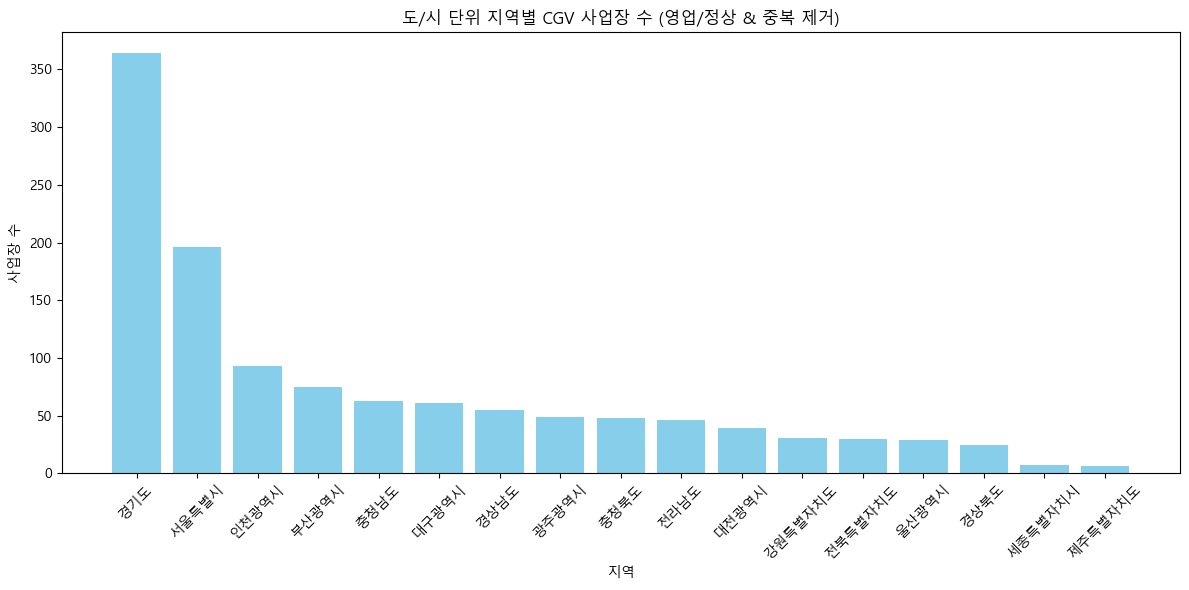

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
file_path = r'C:\skproject\pyproject\fulldata_03_13_02_P_영화상영관.csv'

# 데이터 불러오기
df = pd.read_csv(file_path, encoding='cp949')

# 'CGV' 포함 + '영업/정상'인 행 필터링
cgv_df = df[
    df['사업장명'].str.contains('CGV', na=False) &
    (df['영업상태명'] == '영업/정상')
]

# 중복 제거 (사업장명 + 주소가 동일한 경우 동일 지점으로 간주)
cgv_df = cgv_df.drop_duplicates(subset=['사업장명', '소재지전체주소'])

# 소재지 주소에서 도/시 추출
cgv_df['지역'] = cgv_df['소재지전체주소'].str.extract(r'(^\S+?[도시])')

# 지역별 CGV 수 집계
cgv_by_province = cgv_df['지역'].value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(cgv_by_province.index, cgv_by_province.values, color='skyblue')
plt.title('도/시 단위 지역별 CGV 사업장 수 (영업/정상 & 중복 제거)')
plt.xlabel('지역')
plt.ylabel('사업장 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
data =pd.read_csv('fulldata_03_13_02_P_영화상영관.csv', encoding='cp949', low_memory=False)

In [8]:
data.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,편의시설여부,소방시설여부,총게임기수,기존게임업외업종명,제공게임물명,공연장형태구분명,품목명,최초등록시점,지역구분명,Unnamed: 59
0,1,영화상영관,03_13_02_P,4261000,CDFF4220002018000001,2018-01-29,NaN,4,취소/말소/만료/정지/중지,31,...,NaN,NaN,0.0,NaN,NaN,영화관,NaN,20180129,NaN,NaN
1,2,영화상영관,03_13_02_P,4261000,CDFF4220002018000002,2018-01-29,NaN,4,취소/말소/만료/정지/중지,31,...,NaN,NaN,0.0,NaN,NaN,영화관,NaN,20180129,NaN,NaN
2,3,영화상영관,03_13_02_P,5670000,CDFF4220002004100001,2004-12-10,NaN,4,취소/말소/만료/정지/중지,31,...,NaN,NaN,NaN,NaN,NaN,영화관,NaN,20041210,상업지역,NaN
3,4,영화상영관,03_13_02_P,5670000,CDFF4220002004100002,2004-12-10,NaN,4,취소/말소/만료/정지/중지,31,...,NaN,NaN,NaN,NaN,NaN,영화관,NaN,20041210,상업지역,NaN
4,5,영화상영관,03_13_02_P,5670000,CDFF4220002004100003,2004-12-10,NaN,4,취소/말소/만료/정지/중지,31,...,NaN,NaN,NaN,NaN,NaN,영화관,NaN,20041210,상업지역,NaN


In [15]:
# 1. CGV 포함된 데이터 필터링
cgv_df = data[data['사업장명'].str.contains('CGV', na=False)]

# 2. 도/시 정보 추출 (소재지전체주소 기준)
cgv_df['지역'] = cgv_df['소재지전체주소'].str.extract(r'(^\S+?[도시])')

# 3. 지역별 CGV 수 집계 → DataFrame으로 변환
cgv_by_region_df = cgv_df['지역'].value_counts().sort_values(ascending=False).reset_index()
cgv_by_region_df.columns = ['지역', 'CGV_사업장수']

# 4. 출력
print(cgv_by_region_df)



         지역  CGV_사업장수
0       경기도       393
1     서울특별시       227
2     인천광역시       102
3     부산광역시        80
4     대구광역시        80
5      충청남도        63
6     광주광역시        60
7      경상남도        55
8      충청북도        48
9      전라남도        46
10  전북특별자치도        43
11    대전광역시        39
12    울산광역시        36
13  강원특별자치도        31
14     경상북도        26
15  세종특별자치시         7
16  제주특별자치도         6


C:\Users\User\AppData\Local\Temp\ipykernel_11348\2339030720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cgv_df['지역'] = cgv_df['소재지전체주소'].str.extract(r'(^\S+?[도시])')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   번호               5125 non-null   int64  
 1   개방서비스명           5125 non-null   object 
 2   개방서비스아이디         5125 non-null   object 
 3   개방자치단체코드         5125 non-null   int64  
 4   관리번호             5125 non-null   object 
 5   인허가일자            5125 non-null   object 
 6   인허가취소일자          0 non-null      float64
 7   영업상태구분코드         5125 non-null   int64  
 8   영업상태명            5125 non-null   object 
 9   상세영업상태코드         5125 non-null   object 
 10  상세영업상태명          5111 non-null   object 
 11  폐업일자             1356 non-null   object 
 12  휴업시작일자           62 non-null     object 
 13  휴업종료일자           60 non-null     object 
 14  재개업일자            0 non-null      float64
 15  소재지전화            3566 non-null   object 
 16  소재지면적            0 non-null      float64
 17  소재지우편번호       

In [17]:
cgv_by_region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   CGV_사업장수  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


In [18]:
data.describe()

,번호,개방자치단체코드,인허가취소일자,영업상태구분코드,재개업일자,소재지면적,업태구분명,좌표정보x(epsg5174),좌표정보y(epsg5174),총층수,...,조명시설유무,음향시설여부,편의시설여부,소방시설여부,총게임기수,기존게임업외업종명,제공게임물명,품목명,최초등록시점,Unnamed: 59
count,5125.000000,5.125000e+03,0.0,5125.000000,0.0,0.0,0.0,4909.000000,4909.000000,4028.000000,...,0.0,0.0,0.0,0.0,2572.0,0.0,0.0,0.0,5.125000e+03,0.0
mean,2563.000000,4.050395e+06,NaN,1.614244,NaN,NaN,NaN,242078.520382,345670.976230,8.070258,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.009312e+07,NaN
std,1479.604395,8.277851e+05,NaN,0.966088,NaN,NaN,NaN,74325.798938,117748.218305,8.039496,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8.552620e+04,NaN
min,1.000000,3.000000e+06,NaN,1.000000,NaN,NaN,NaN,131888.023276,-27615.189971,0.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.945102e+07,NaN
25%,1282.000000,3.410000e+06,NaN,1.000000,NaN,NaN,NaN,191741.345848,257657.843797,0.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.003120e+07,NaN
50%,2563.000000,3.860000e+06,NaN,1.000000,NaN,NaN,NaN,208976.476452,407341.074014,8.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.007120e+07,NaN
75%,3844.000000,4.600000e+06,NaN,3.000000,NaN,NaN,NaN,287371.668468,445934.810717,12.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.017012e+07,NaN
max,5125.000000,6.520000e+06,NaN,4.000000,NaN,NaN,NaN,420536.166827,542805.047261,63.000000,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.025053e+07,NaN
